# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [20]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [21]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [22]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [23]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

# Data Pre-Processing

In [24]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [25]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [26]:
sc_mapping = {
    'Internet': 0,
    'Mobile': 1,
}

df['sales_channel'] = df['sales_channel'].map(sc_mapping)

In [27]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,0,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,0,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,0,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,0,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [28]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [29]:
tt_mapping = {
    'RoundTrip' : 0,
    'OneWay' : 1,
    'CircleTrip' : 2,
}

df['trip_type'] = df['trip_type'].map(tt_mapping)

In [30]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,0,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,0,0,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,0,0,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,0,0,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,0,0,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [31]:
df['route'].unique().shape

(799,)

## Too many unique values in 'route' column
#### This might lead to overfitting and makes it generally difficult to handle accurately for ML model
#### So we are going to use hashing in order to narrow down the number of categories and convert them into numerical format

In [32]:
import category_encoders as ce

# Create a Hashing encoder
encoder = ce.HashingEncoder(n_components=20)

# Fit and transform the data
df_encoded = encoder.fit_transform(df['route'])

# Concatenate the original dataframe with the encoded dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'route' column
df = df.drop('route', axis=1)

In [33]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,...,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
0,2,0,0,262,19,7,6,New Zealand,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,112,20,3,6,New Zealand,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,0,0,243,22,17,3,India,1,1,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,96,31,4,6,New Zealand,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2,0,0,68,22,15,3,India,1,0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
df['booking_origin'].unique().shape

(104,)

## Again too many unique countries
#### This time we are going to use binary encoding in order not to have too many columns

In [35]:
# Create the binary encoder
binary_enc = ce.BinaryEncoder(cols=['booking_origin'])

# Fit and transform the booking_origin column
df_binary = binary_enc.fit_transform(df['booking_origin'])

# Concatenate the original DataFrame and the binary encoded DataFrame
df = pd.concat([df, df_binary], axis=1)

In [36]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,...,col_17,col_18,col_19,booking_origin_0,booking_origin_1,booking_origin_2,booking_origin_3,booking_origin_4,booking_origin_5,booking_origin_6
0,2,0,0,262,19,7,6,New Zealand,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,112,20,3,6,New Zealand,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0,243,22,17,3,India,1,1,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,96,31,4,6,New Zealand,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,0,68,22,15,3,India,1,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
# Drop the original 'route' column
df = df.drop('booking_origin', axis=1)

In [38]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,col_17,col_18,col_19,booking_origin_0,booking_origin_1,booking_origin_2,booking_origin_3,booking_origin_4,booking_origin_5,booking_origin_6
0,2,0,0,262,19,7,6,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,112,20,3,6,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0,243,22,17,3,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,96,31,4,6,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2,0,0,68,22,15,3,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [39]:
df.to_csv('data123.csv', index=False)

## Hashing = uncertainty

#### It seems like hashing routes was a bad and unclear idea, so let's just use binary encoding for that as well

In [40]:
route = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")
# only keep the route column
route = route[['route']]

df['route'] = route
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,col_18,col_19,booking_origin_0,booking_origin_1,booking_origin_2,booking_origin_3,booking_origin_4,booking_origin_5,booking_origin_6,route
0,2,0,0,262,19,7,6,1,0,0,...,0,0,0,0,0,0,0,0,1,AKLDEL
1,1,0,0,112,20,3,6,0,0,0,...,0,0,0,0,0,0,0,0,1,AKLDEL
2,2,0,0,243,22,17,3,1,1,0,...,0,0,0,0,0,0,0,1,0,AKLDEL
3,1,0,0,96,31,4,6,0,0,1,...,0,0,0,0,0,0,0,0,1,AKLDEL
4,2,0,0,68,22,15,3,1,0,1,...,0,0,0,0,0,0,0,1,0,AKLDEL


In [41]:
# drop columns with names containing a 'col_'
old_df = df.copy()

In [42]:
old_df.drop(old_df.columns[old_df.columns.str.contains('col_')], axis=1, inplace=True)

In [43]:
old_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_0,booking_origin_1,booking_origin_2,booking_origin_3,booking_origin_4,booking_origin_5,booking_origin_6,route
0,2,0,0,262,19,7,6,1,0,0,5.52,0,0,0,0,0,0,0,1,AKLDEL
1,1,0,0,112,20,3,6,0,0,0,5.52,0,0,0,0,0,0,0,1,AKLDEL
2,2,0,0,243,22,17,3,1,1,0,5.52,0,0,0,0,0,0,1,0,AKLDEL
3,1,0,0,96,31,4,6,0,0,1,5.52,0,0,0,0,0,0,0,1,AKLDEL
4,2,0,0,68,22,15,3,1,0,1,5.52,0,0,0,0,0,0,1,0,AKLDEL


In [44]:
df = old_df.copy()

In [45]:
# Binary encoding of route column
# Create the binary encoder
binary_enc = ce.BinaryEncoder(cols=['route'])

# Fit and transform the booking_origin column
df_binary = binary_enc.fit_transform(df['route'])

# Concatenate the original DataFrame and the binary encoded DataFrame
df = pd.concat([df, df_binary], axis=1)

In [46]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,route_0,route_1,route_2,route_3,route_4,route_5,route_6,route_7,route_8,route_9
0,2,0,0,262,19,7,6,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,112,20,3,6,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0,243,22,17,3,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,96,31,4,6,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2,0,0,68,22,15,3,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [47]:
df.to_csv('data123.csv', index=False)

In [48]:
df = df.drop('route', axis=1)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int64  
 2   trip_type              50000 non-null  int64  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   wants_extra_baggage    50000 non-null  int64  
 8   wants_preferred_seat   50000 non-null  int64  
 9   wants_in_flight_meals  50000 non-null  int64  
 10  flight_duration        50000 non-null  float64
 11  booking_complete       50000 non-null  int64  
 12  booking_origin_0       50000 non-null  int64  
 13  booking_origin_1       50000 non-null  int64  
 14  booking_origin_2       50000 non-null  int64  
 15  bo

# Training ML Random Forest Classifier(RFC)

- ### 1000 decision trees
- ### 25 % of dataset goes to test
- ### random_state = 42 for reproducibility

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features = df.drop('booking_complete', axis=1)
labels = df['booking_complete']

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

# Instantiate model with 1000 decision trees
rfc = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the model on training data
rfc.fit(train_features, train_labels)

# Use the forest's predict method on the test data
y_pred = rfc.predict(test_features)

# Print the accuracy score of the fitted model
print('Accuracy Score: ', accuracy_score(test_labels, y_pred))

# Plot:
# 1. Feature Importance
# 2. Confusion Matrix
# 3. ROC Curve

Accuracy Score:  0.85424


!git init
!git add model.ipynb
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/AgileStoner/BA-Internship.git
!git push -u origin main

In [53]:
# import pickle
import pickle

# Save the model to disk
filename = 'model.sav'

# Save the model to disk
pickle.dump(rfc, open(filename, 'wb'))

Text(0.5, 0, 'Average contribution to information gain')

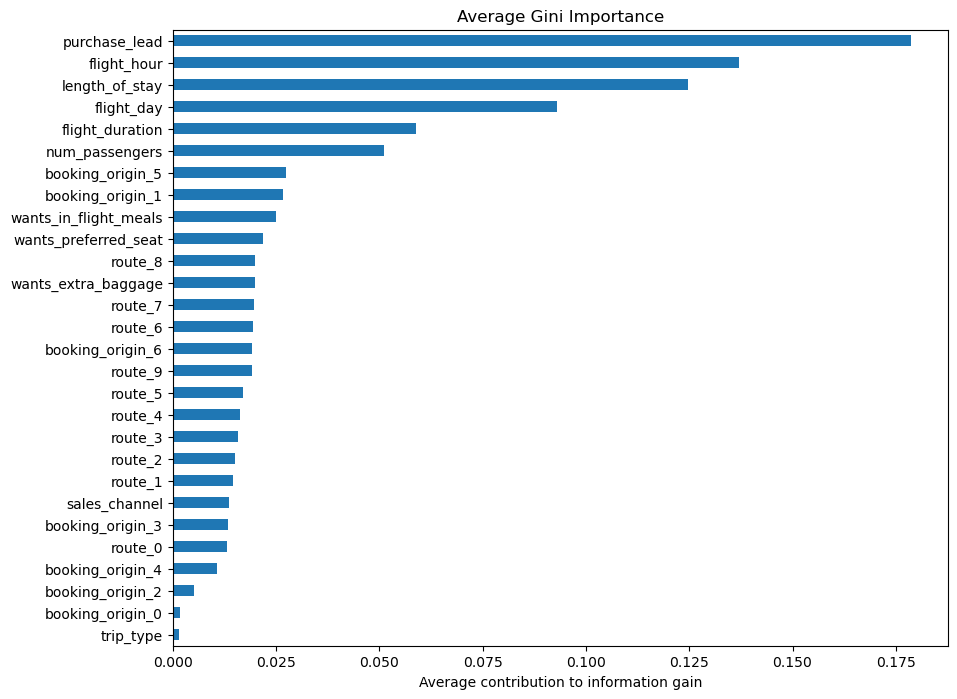

In [54]:
# Plot the feature importance
feat_scores = pd.Series(rfc.feature_importances_,
                            index=features.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', figsize=(10, 8))
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain')

The most significant factor in determining customer behaviour being purchase_lead makes sense

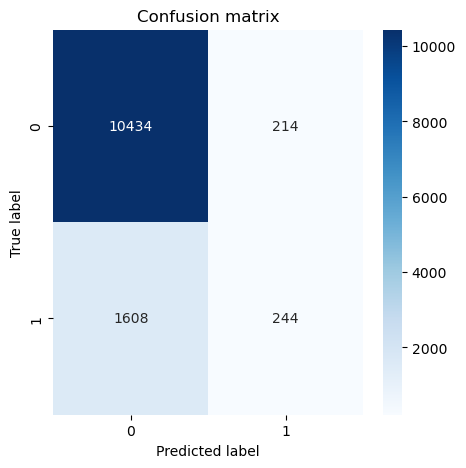

In [57]:
# Plot the confusion matrix
# Input: y_true, y_pred
# Output: confusion matrix

# import confusion_matrix
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

plot_confusion_matrix(test_labels, y_pred)

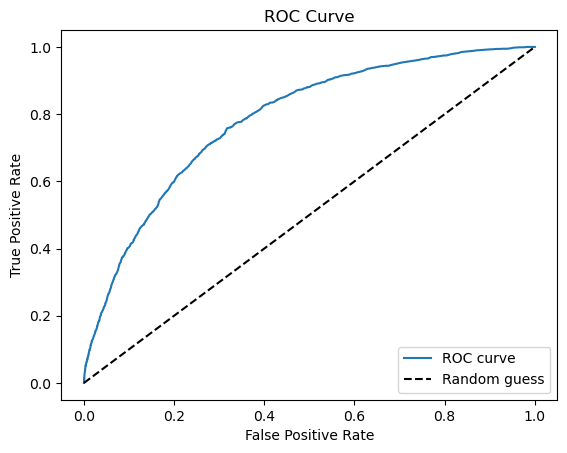

In [68]:
# Plot ROC curve for the model
# Input: model, X_test, y_test
# Output: ROC curve
from sklearn.metrics import roc_curve

def plot_roc_curve(model, X_test, y_test):
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(rfc, test_features, test_labels)

# Summary

- Accuracy = 85%
- Binary encoding was used to clean the dataset
- ROC seems ok, even though we could have improved the performance by Hyperparameter Tuning
- Performance could have been improved by using techniques such as Grid Search or Randomized Search in order to optimize the parameters

In [69]:
from sklearn.metrics import roc_auc_score
y_pred_prob = rfc.predict_proba(test_features)[:, 1]

roc_auc = roc_auc_score(test_labels, y_pred_prob)
print('ROC AUC Score:', roc_auc)

ROC AUC Score: 0.7840556658547706
